In [32]:
# Import libraries for data manipulation and data cleaning

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [33]:
# Load the data
data = pd.read_excel('Compras.xlsx')

In [34]:
# Display the first 5 rows of the data
data.head()

,fecha_odc,nro_odc,cod_prod,cod_prov,cant_prod_odc,prec_unt,monto_odc,fecha_entrega,fecha_recibido,cant_recibida,monto_recibido,estado_odc
0,2018-01-08,ODC-1T-0001,P0001,PV00001,40,100,4000,2018-03-09,2018-03-09,40,4000,concluido
1,2018-01-08,ODC-1T-0001,P0002,PV00001,50,150,7500,2018-03-09,2018-03-09,50,7500,concluido
2,2018-01-08,ODC-1T-0001,P0003,PV00001,65,200,13000,2018-03-09,2018-03-09,65,13000,concluido
3,2018-01-12,ODC-1T-0002,P0004,PV00002,50,250,12500,2018-01-27,2018-01-27,50,12500,concluido
4,2018-01-12,ODC-1T-0002,P0005,PV00002,55,300,16500,2018-01-27,2018-01-27,55,16500,concluido


In [35]:
# Display the last 5 rows of the data
data.tail()

,fecha_odc,nro_odc,cod_prod,cod_prov,cant_prod_odc,prec_unt,monto_odc,fecha_entrega,fecha_recibido,cant_recibida,monto_recibido,estado_odc
267,2018-12-21,ODC-4T-0016,P0043,PV00015,43,350,15050,2018-12-26,2018-12-26,43,15050,concluido
268,2018-12-28,ODC-4T-0017,P0044,PV00016,57,20,1140,2019-01-02,2019-01-02,57,1140,concluido
269,2018-12-28,ODC-4T-0017,P0045,PV00016,68,25,1700,2019-01-02,2019-01-02,68,1700,concluido
270,2018-12-28,ODC-4T-0018,P0046,PV00017,32,20,640,2019-02-26,2019-02-26,32,640,concluido
271,2018-12-28,ODC-4T-0018,P0047,PV00017,34,300,10200,2019-02-26,2019-02-26,34,10200,concluido


In [36]:
# Display the shape of the data
print(f"The data has {data.shape[0]} rows and {data.shape[1]} columns")

The data has 272 rows and 12 columns


In [37]:
# Display the information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   fecha_odc       272 non-null    datetime64[ns]
 1   nro_odc         272 non-null    object        
 2   cod_prod        272 non-null    object        
 3   cod_prov        272 non-null    object        
 4   cant_prod_odc   272 non-null    int64         
 5   prec_unt        272 non-null    int64         
 6   monto_odc       272 non-null    int64         
 7   fecha_entrega   272 non-null    datetime64[ns]
 8   fecha_recibido  272 non-null    datetime64[ns]
 9   cant_recibida   272 non-null    int64         
 10  monto_recibido  272 non-null    int64         
 11  estado_odc      272 non-null    object        
dtypes: datetime64[ns](3), int64(5), object(4)
memory usage: 25.6+ KB


In [38]:
# Add new columns

# 1. `ontime`: Indicates if the delivery was on time
data['ontime'] = data['fecha_entrega'] >= data['fecha_recibido']

# 2. `OTIF`: On Time In Full
data['OTIF'] = (data['ontime']) & (data['cant_prod_odc'] == data['cant_recibida'])

# 3. `delivery_days`: Number of days between the order date and the delivery date
data['delivery_days'] = (data['fecha_entrega'] - data['fecha_odc']).dt.days

# 4. `reception_days`: Number of days between the order date and the reception date
data['reception_days'] = (data['fecha_recibido'] - data['fecha_odc']).dt.days

# 5. `percentage_received`: Percentage of the received quantity relative to the ordered quantity
data['percentage_received'] = (data['cant_recibida'] / data['cant_prod_odc']) * 100

# 6. `amount_difference`: Difference between the ordered amount and the received amount
data['amount_difference'] = data['monto_odc'] - data['monto_recibido']

# 7. `total_amount`: Total amount of the order (quantity ordered * unit price)
data['total_amount'] = data['cant_prod_odc'] * data['prec_unt']

# Display the first few rows of the DataFrame with the new columns
data.head()


,fecha_odc,nro_odc,cod_prod,cod_prov,cant_prod_odc,prec_unt,monto_odc,fecha_entrega,fecha_recibido,cant_recibida,monto_recibido,estado_odc,ontime,OTIF,delivery_days,reception_days,percentage_received,amount_difference,total_amount
0,2018-01-08,ODC-1T-0001,P0001,PV00001,40,100,4000,2018-03-09,2018-03-09,40,4000,concluido,True,True,60,60,100.0,0,4000
1,2018-01-08,ODC-1T-0001,P0002,PV00001,50,150,7500,2018-03-09,2018-03-09,50,7500,concluido,True,True,60,60,100.0,0,7500
2,2018-01-08,ODC-1T-0001,P0003,PV00001,65,200,13000,2018-03-09,2018-03-09,65,13000,concluido,True,True,60,60,100.0,0,13000
3,2018-01-12,ODC-1T-0002,P0004,PV00002,50,250,12500,2018-01-27,2018-01-27,50,12500,concluido,True,True,15,15,100.0,0,12500
4,2018-01-12,ODC-1T-0002,P0005,PV00002,55,300,16500,2018-01-27,2018-01-27,55,16500,concluido,True,True,15,15,100.0,0,16500


In [39]:
# 1. General Description of the DataFrame
print("General Description of the DataFrame:")
print(data.info())
print("\nNull Values per Column:")
print(data.isnull().sum())
print("\nDuplicate Values:")
print(data.duplicated().sum())

General Description of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   fecha_odc            272 non-null    datetime64[ns]
 1   nro_odc              272 non-null    object        
 2   cod_prod             272 non-null    object        
 3   cod_prov             272 non-null    object        
 4   cant_prod_odc        272 non-null    int64         
 5   prec_unt             272 non-null    int64         
 6   monto_odc            272 non-null    int64         
 7   fecha_entrega        272 non-null    datetime64[ns]
 8   fecha_recibido       272 non-null    datetime64[ns]
 9   cant_recibida        272 non-null    int64         
 10  monto_recibido       272 non-null    int64         
 11  estado_odc           272 non-null    object        
 12  ontime               272 non-null    bool          
 1

In [40]:
# 2. Descriptive Statistics
print("\nDescriptive Statistics:")
data.describe()


Descriptive Statistics:


,fecha_odc,cant_prod_odc,prec_unt,monto_odc,fecha_entrega,fecha_recibido,cant_recibida,monto_recibido,delivery_days,reception_days,percentage_received,amount_difference,total_amount
count,272,272.000000,272.000000,272.000000,272,272,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000
mean,2018-07-02 17:12:21.176470528,42.044118,535.974265,22272.591912,2018-07-22 02:33:31.764705792,2018-07-22 05:22:56.470588160,42.198529,22376.636029,19.389706,19.507353,100.955800,-104.044118,22272.591912
min,2018-01-08 00:00:00,5.000000,20.000000,220.000000,2018-01-24 00:00:00,2018-01-24 00:00:00,5.000000,220.000000,1.000000,1.000000,93.023256,-6750.000000,220.000000
25%,2018-03-29 00:00:00,27.000000,220.000000,8040.000000,2018-04-24 00:00:00,2018-04-24 00:00:00,27.750000,8040.000000,5.000000,5.000000,100.000000,0.000000,8040.000000
50%,2018-06-28 00:00:00,43.000000,400.000000,13625.000000,2018-07-18 12:00:00,2018-07-18 12:00:00,43.000000,13625.000000,15.000000,15.000000,100.000000,0.000000,13625.000000
75%,2018-10-08 00:00:00,55.000000,800.000000,27600.000000,2018-10-26 00:00:00,2018-10-28 00:00:00,55.000000,27600.000000,20.250000,20.250000,100.000000,0.000000,27600.000000
max,2018-12-28 00:00:00,90.000000,1500.000000,111250.000000,2019-02-26 00:00:00,2019-02-26 00:00:00,90.000000,111250.000000,60.000000,60.000000,307.692308,1000.000000,111250.000000
std,NaN,19.705532,402.639661,23221.989809,NaN,NaN,19.593402,23281.821183,18.283004,18.205062,12.815854,905.896126,23221.989809


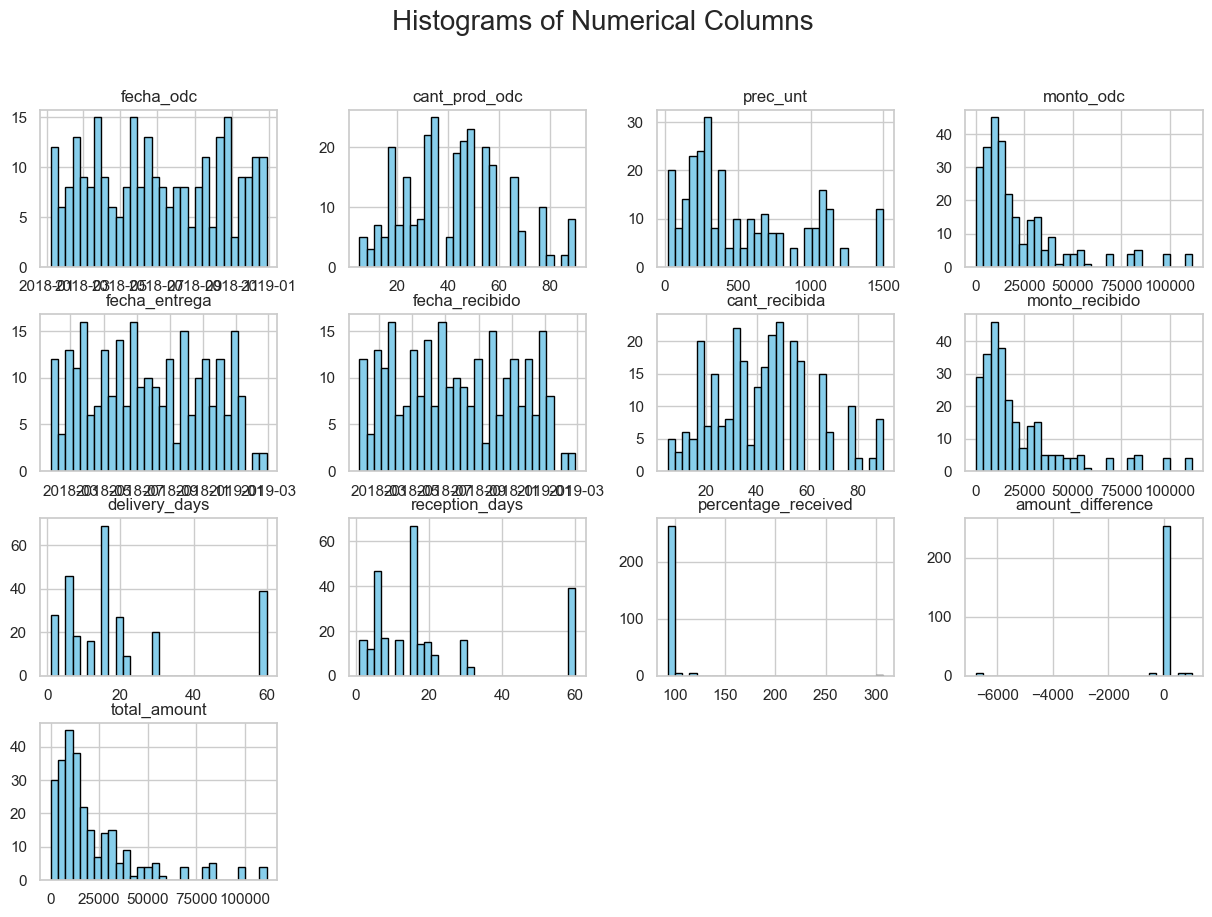

In [41]:
# 3. Data Visualization
# Histograms for numerical columns with seaborn
sns.set_style(style="whitegrid")
data.hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
plt.show()

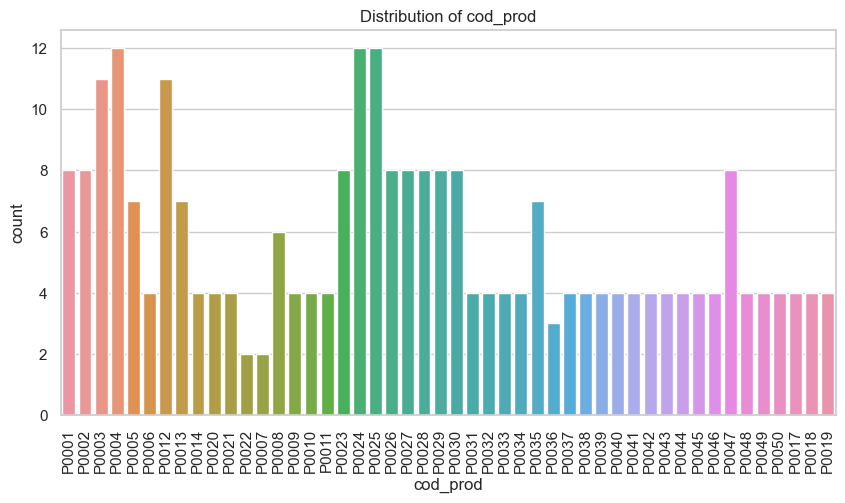

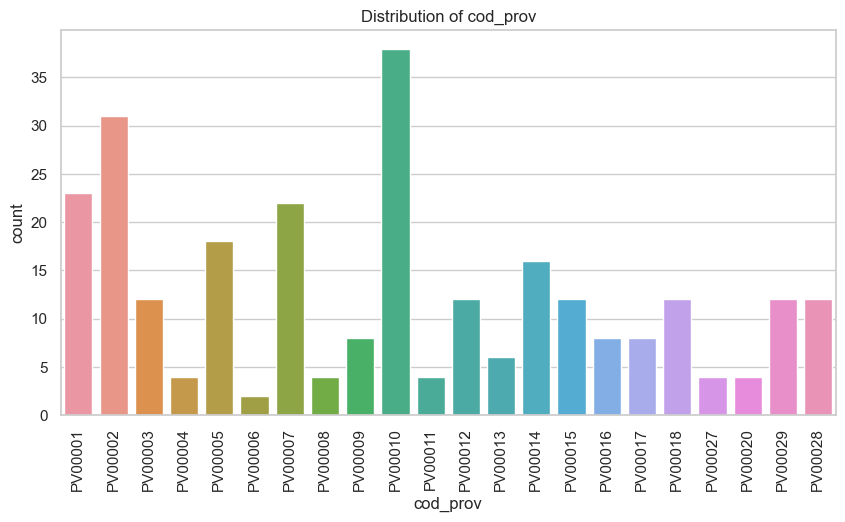

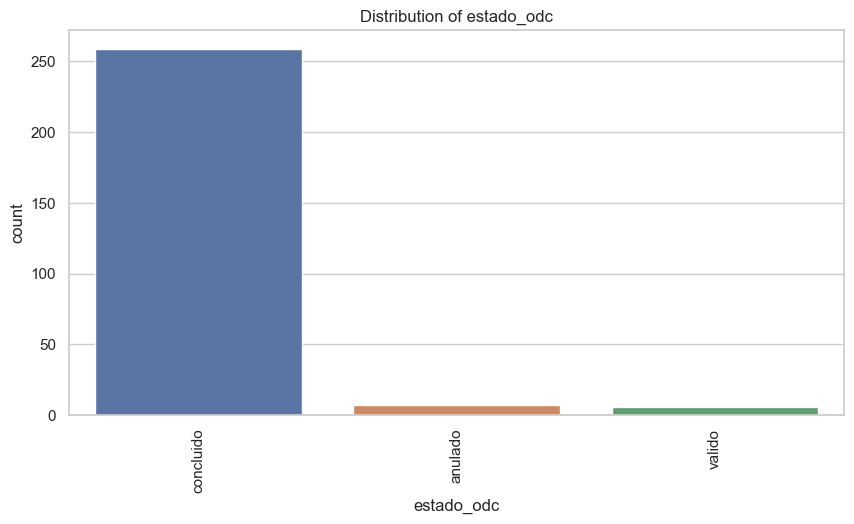

In [42]:
# Bar plots for categorical columns
for col in ['cod_prod', 'cod_prov', 'estado_odc']:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=data, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)
    plt.show()

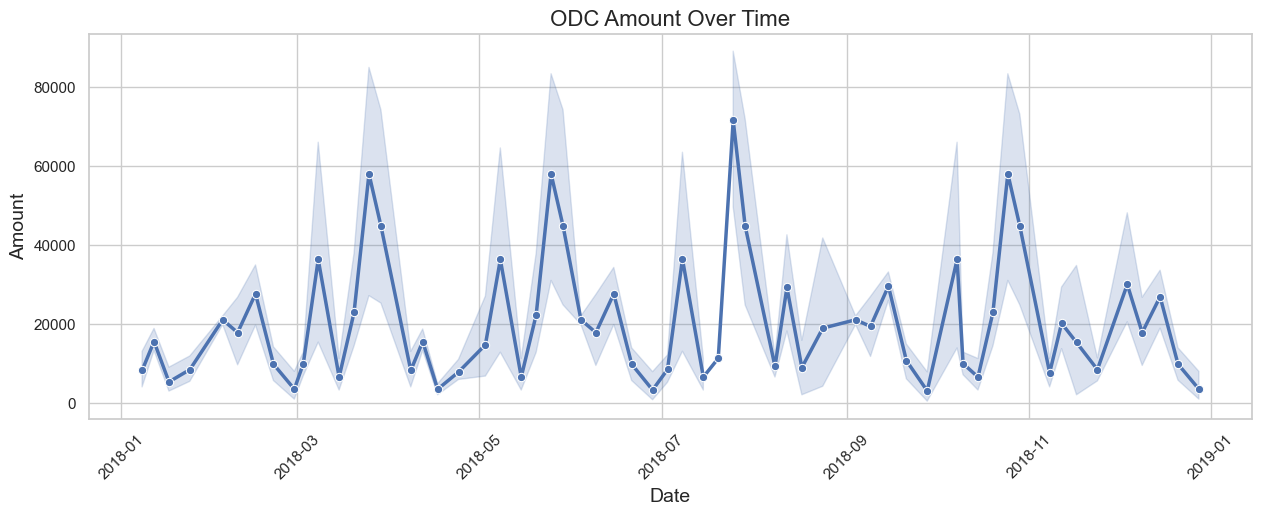

In [43]:
# Line plots for time series with improved aesthetics
plt.figure(figsize=(15, 5))
sns.lineplot(data=data, x='fecha_odc', y='monto_odc', marker='o', color='b', linewidth=2.5)
plt.title('ODC Amount Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

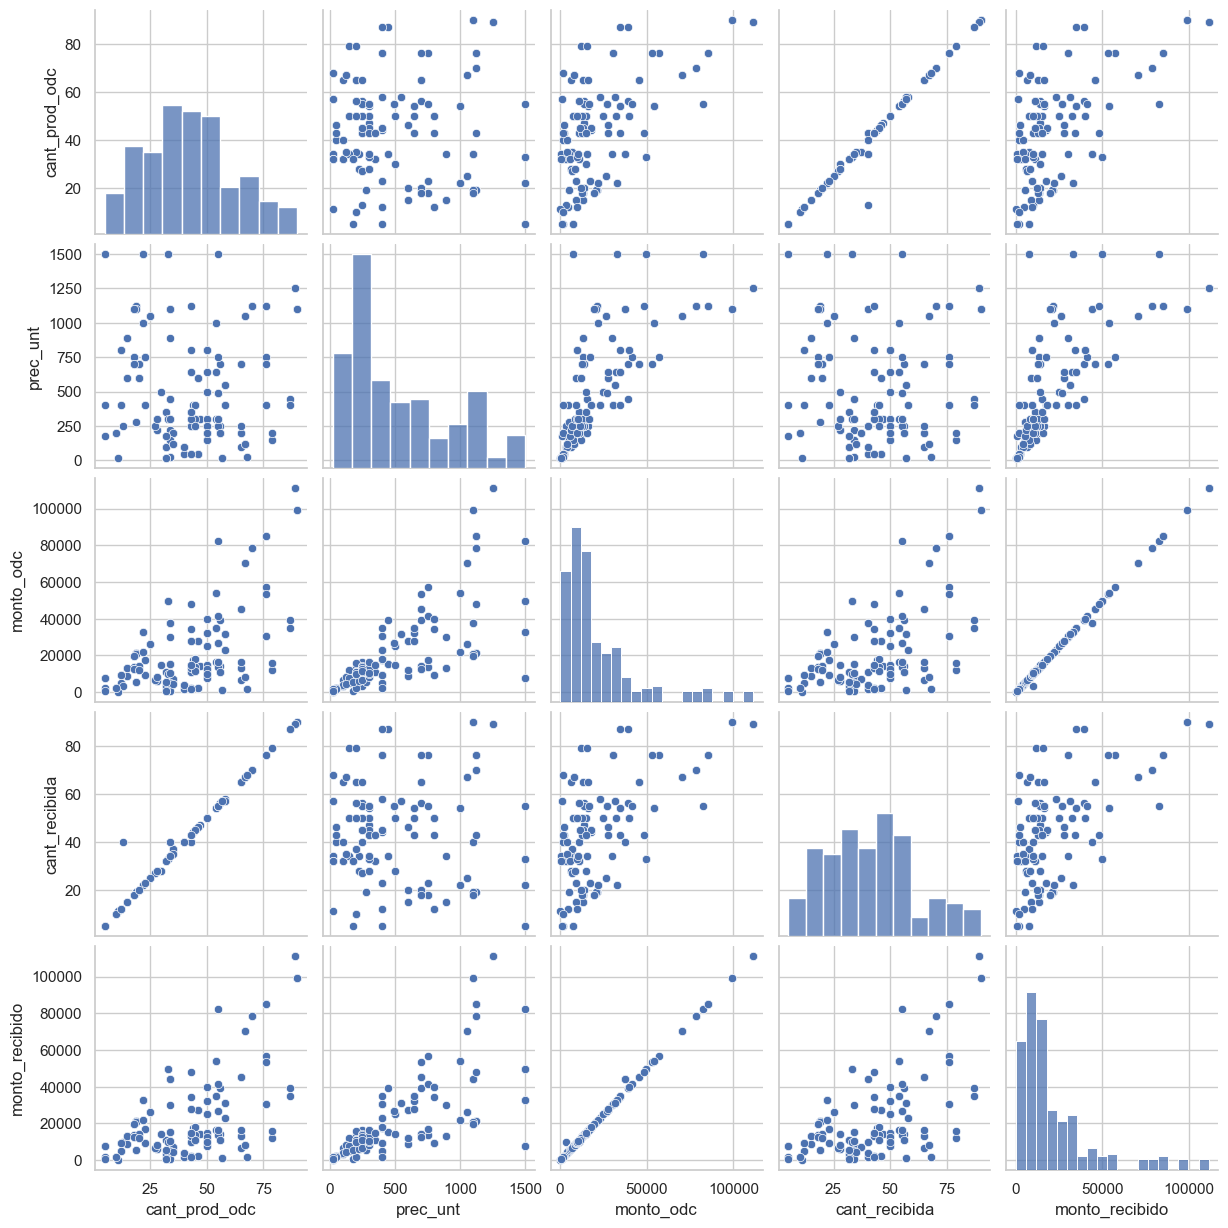

In [48]:
# 4. Relationship Analysis
# Scatter plots between numerical variables
sns.pairplot(data, vars=['cant_prod_odc', 'prec_unt', 'monto_odc', 'cant_recibida', 'monto_recibido'])
plt.show()

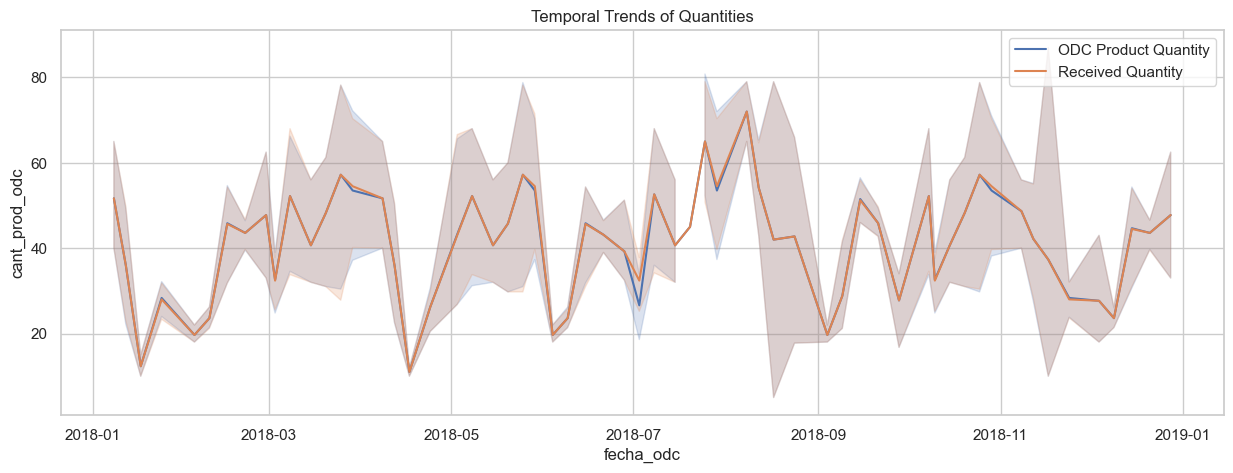

In [45]:
# Analysis of temporal trends
plt.figure(figsize=(15, 5))
sns.lineplot(data=data, x='fecha_odc', y='cant_prod_odc', label='ODC Product Quantity')
sns.lineplot(data=data, x='fecha_odc', y='cant_recibida', label='Received Quantity')
plt.title('Temporal Trends of Quantities')
plt.legend()
plt.show()

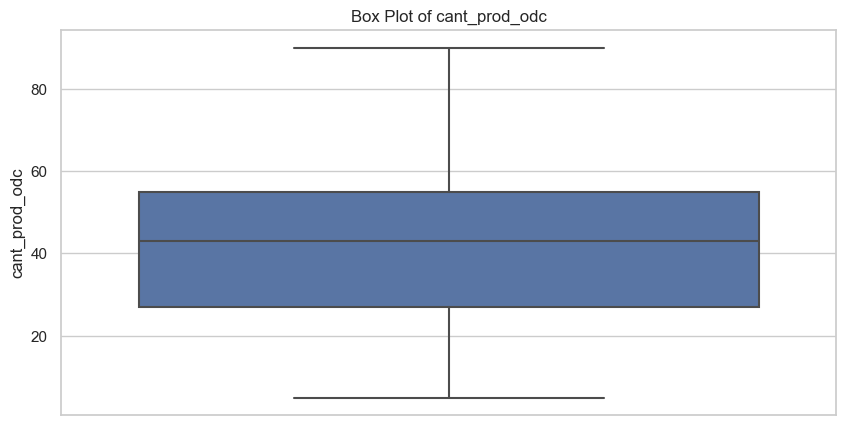

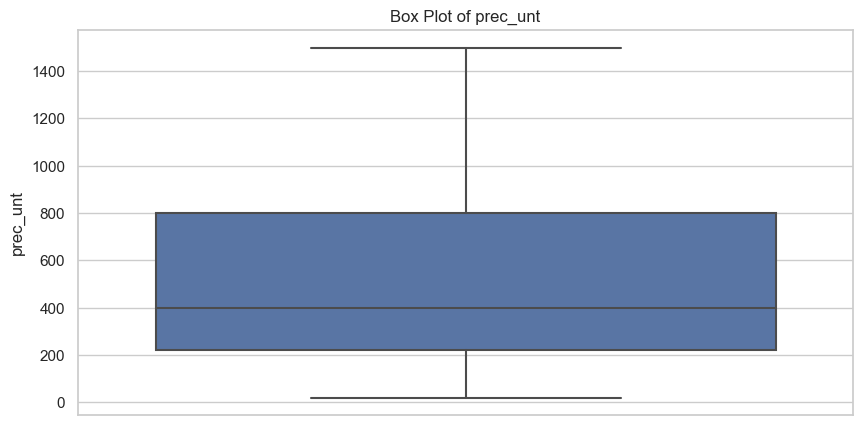

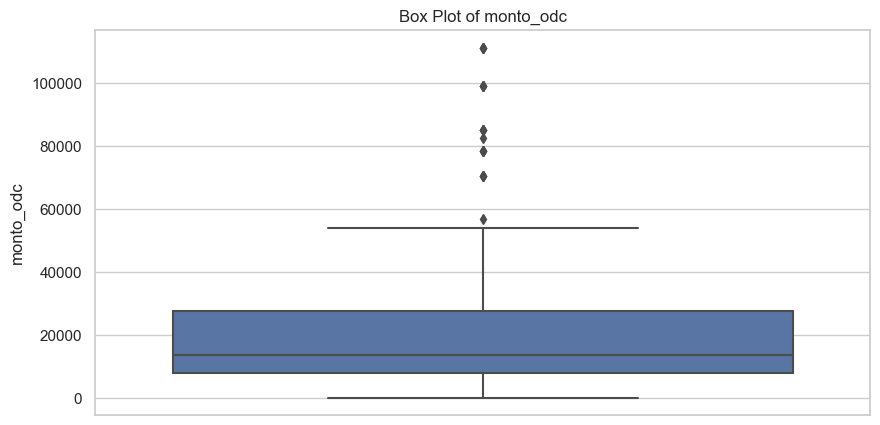

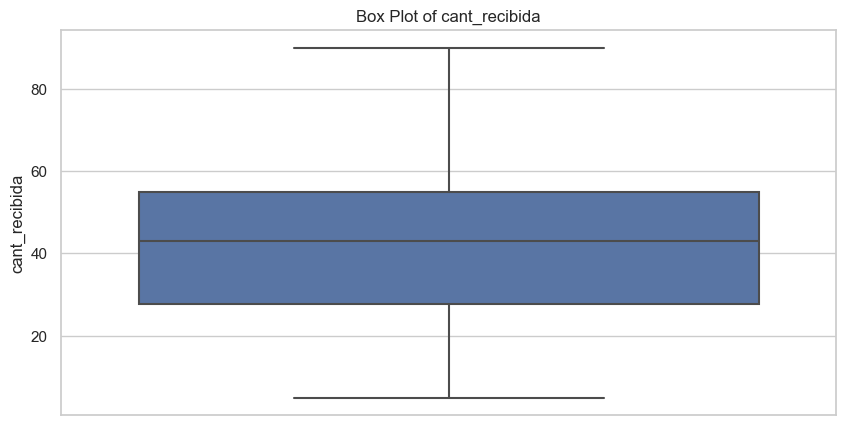

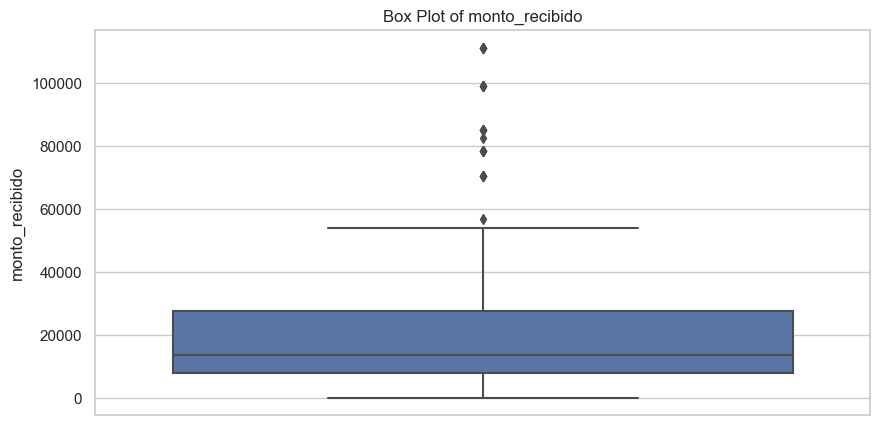

In [46]:
# Checking for Outliers
# Box plots for numerical columns
for col in ['cant_prod_odc', 'prec_unt', 'monto_odc', 'cant_recibida', 'monto_recibido']:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=data, y=col)
    plt.title(f'Box Plot of {col}')
    plt.show()

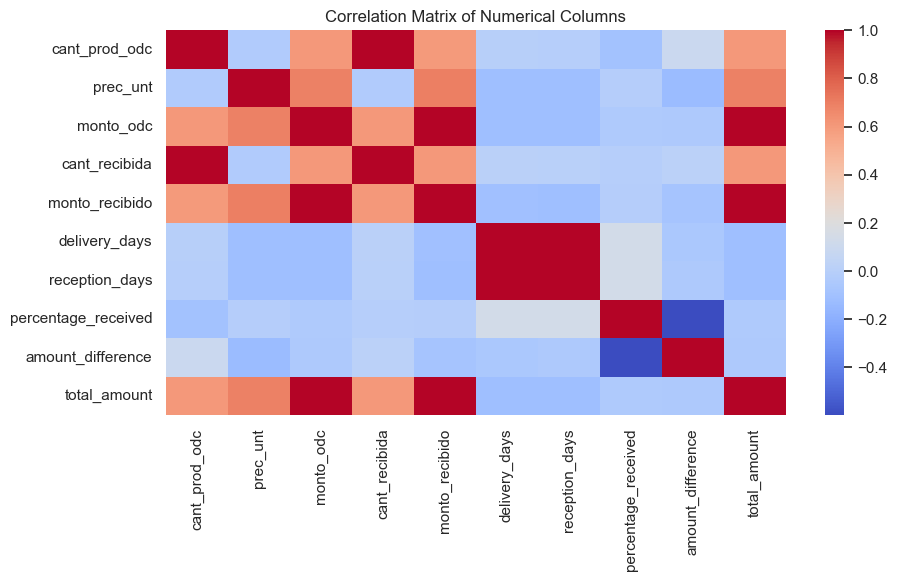

In [47]:
# Seleccionar solo las columnas numéricas
numerical_data = data.select_dtypes(include=['number'])

# Correlation matrix and heatmap of numerical columns without values inside the heatmap
corr_matrix = numerical_data.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

# Analysis of the Correlation Matrix

The correlation matrix shows the relationships between the numerical variables in the DataFrame. Correlation values range between -1 and 1, where:
- 1 indicates a perfect positive correlation.
- -1 indicates a perfect negative correlation.
- 0 indicates no correlation.

Below is the analysis of the most relevant correlations:

## High Correlations (positive)

1. **`cant_prod_odc` and `cant_recibida`**:
   - Correlation: 0.995613
   - Analysis: There is a very strong positive correlation between the ordered product quantity (`cant_prod_odc`) and the received quantity (`cant_recibida`). This suggests that in most cases, the ordered quantity is almost equal to the received quantity.

2. **`monto_odc` and `monto_recibido`**:
   - Correlation: 0.999244
   - Analysis: There is an almost perfect positive correlation between the order amount (`monto_odc`) and the received amount (`monto_recibido`). This indicates that the ordered and received amounts are practically the same.

3. **`prec_unt` and `monto_odc`**:
   - Correlation: 0.690703
   - Analysis: There is a strong positive correlation between the unit price (`prec_unt`) and the order amount (`monto_odc`). This suggests that as the unit price increases, the total order amount also increases.

4. **`prec_unt` and `monto_recibido`**:
   - Correlation: 0.694087
   - Analysis: Similar to the previous correlation, there is a strong positive correlation between the unit price (`prec_unt`) and the received amount (`monto_recibido`).

5. **`monto_odc` and `total_amount`**:
   - Correlation: 1.000000
   - Analysis: There is a perfect positive correlation between the order amount (`monto_odc`) and the total amount (`total_amount`). This is expected as `total_amount` is derived from the ordered quantity and unit price.

6. **`monto_recibido` and `total_amount`**:
   - Correlation: 0.999244
   - Analysis: There is an almost perfect positive correlation between the received amount (`monto_recibido`) and the total amount (`total_amount`).

## Moderate Correlations

1. **`cant_prod_odc` and `monto_odc`**:
   - Correlation: 0.600827
   - Analysis: There is a moderate positive correlation between the ordered product quantity (`cant_prod_odc`) and the order amount (`monto_odc`). This indicates that as the ordered quantity increases, the order amount also increases.

2. **`cant_recibida` and `monto_odc`**:
   - Correlation: 0.602819
   - Analysis: There is a moderate positive correlation between the received quantity (`cant_recibida`) and the order amount (`monto_odc`). This suggests that as the received quantity increases, the order amount also increases.

## Low Correlations

1. **`cant_prod_odc` and `prec_unt`**:
   - Correlation: -0.033140
   - Analysis: There is a very low negative correlation between the ordered product quantity (`cant_prod_odc`) and the unit price (`prec_unt`). This indicates that there is no significant relationship between these two variables.

2. **`cant_recibida` and `prec_unt`**:
   - Correlation: -0.030622
   - Analysis: Similar to the previous correlation, there is a very low negative correlation between the received quantity (`cant_recibida`) and the unit price (`prec_unt`).

3. **`delivery_days` and `monto_odc`**:
   - Correlation: -0.112062
   - Analysis: There is a low negative correlation between the delivery days (`delivery_days`) and the order amount (`monto_odc`). This suggests that as the delivery days increase, the order amount slightly decreases.

4. **`reception_days` and `monto_odc`**:
   - Correlation: -0.116290
   - Analysis: There is a low negative correlation between the reception days (`reception_days`) and the order amount (`monto_odc`). This indicates that as the reception days increase, the order amount slightly decreases.

## Conclusion

Overall, the strongest correlations are observed between the ordered and received quantities, as well as between the ordered and received amounts. This suggests that purchase orders and deliveries are closely aligned in terms of quantity and amount. The correlations with the unit price are also significant, indicating that the unit price influences the total order and received amounts. The low correlations indicate that there is no significant relationship between the quantities and the unit price, as well as between the delivery/reception days and the order amount.

In [50]:
# Save the cleaned data to a new csv file
data.to_csv('cleaned_data.csv', index=False)